In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import patsy as pts
import matplotlib.pyplot as plt

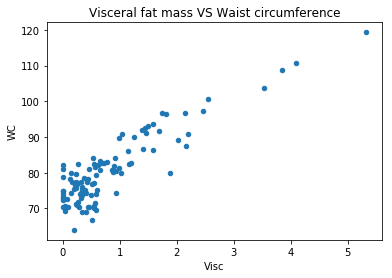

In [2]:
df = pd.read_csv('journal.pone.0234552.s004.csv')
df.plot.scatter(x='Visc', y='WC')
plt.title('Visceral fat mass VS Waist circumference')
plt.show()

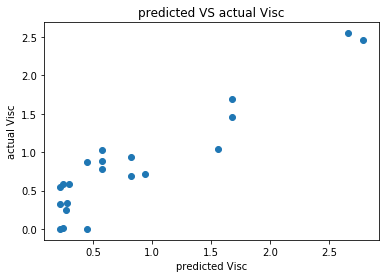

In [5]:
N = df.shape[0] #number of samples

wc = df['Waist circumference']
wc1 = wc - 0.78 #calc wc1
wc2 = np.where(wc < 0.78, 0, 1) #calc wc2
new_var = wc1 * wc2 #calc the new variable
wc = np.expand_dims(wc, axis = 1) #unsqueeze for concatenation
new_var = np.expand_dims(new_var, axis = 1)
x = np.concatenate((wc, new_var), axis = 1)

y = df['Visc'] #get values to predict

#partition of the data into train and test sets
inds = np.arange(N) 
np.random.shuffle(inds)
train_inds = inds[:int(0.8 * N)]
test_inds = inds[int(0.8 * N):]

reg = LinearRegression().fit(x[train_inds], y[train_inds]) #fit linear regression model
pred = reg.predict(x[test_inds]) #get predictions

#plot a scatter graph of the results
plt.scatter(x = pred, y = y[test_inds])
plt.title('predicted VS actual Visc')
plt.xlabel('predicted Visc')
plt.ylabel('actual Visc')
plt.show()

